In [7]:
from platform import python_version
print(python_version())

import torch
print(torch.cuda.is_available())

import foolbox
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt

%matplotlib inline

3.6.9
True


In [3]:
# instantiate model (supports PyTorch, Keras, TensorFlow (Graph and Eager), JAX, MXNet and many more)
model = models.resnet18(pretrained=True).eval()
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
fmodel = foolbox.models.PyTorchModel(model, bounds=(0, 1), num_classes=1000, preprocessing=preprocessing)

# get a batch of images and labels and print the accuracy
images, labels = foolbox.utils.samples(dataset='imagenet', batchsize=16, data_format='channels_first', bounds=(0, 1))
print(np.mean(fmodel.forward(images).argmax(axis=-1) == labels))
# -> 0.9375

# apply the attack
attack = foolbox.attacks.FGSM(fmodel)
adversarials = attack(images, labels)
# if the i'th image is misclassfied without a perturbation, then adversarials[i] will be the same as images[i]
# if the attack fails to find an adversarial for the i'th image, then adversarials[i] will all be np.nan

# Foolbox guarantees that all returned adversarials are in fact in adversarials
print(np.mean(fmodel.forward(adversarials).argmax(axis=-1) == labels))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/lukec/.cache/torch/checkpoints/resnet18-5c106cde.pth
52.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


0.9375
0.0


In [6]:
adversarials.shape

(16, 3, 224, 224)

(224, 224, 3)


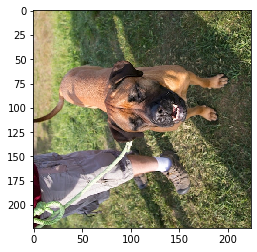

In [24]:
img = adversarials[0]
img = img.swapaxes(0, 2)
print(img.shape)
plt.imshow(img)